# EDA - Analyse exploratoire de données en Python

## 1. Charger les bibliothèques nécessaires

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from sklearn.preprocessing import LabelEncoder
wr.filterwarnings('ignore')

## 2. Charger le CSV

In [34]:
df = pd.read_csv("data/train_with_id.csv")
print(df.head())

   ID  Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   1   60  Female      Yes         No                Yes      Yes         No   
1   2   85    Male      Yes        Yes                Yes      Yes        Yes   
2   3   48    Male      Yes        Yes                Yes       No        Yes   
3   4   41    Male      Yes        Yes                Yes      Yes        Yes   
4   5   57    Male       No         No                 No       No        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0            Yes             Yes     Yes           No             Yes   
1            Yes             Yes     Yes           No             Yes   
2            Yes              No      No           No             Yes   
3            Yes             Yes     Yes          Yes              No   
4             No             Yes      No           No              No   

  partial paresis muscle stiffness Alopecia Obesity     class  
0         

## 3. Analyse des données

In [35]:
df.shape
df.info()
df.describe().T
df.columns.tolist()
df = df.drop('ID', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  416 non-null    int64 
 1   Age                 416 non-null    int64 
 2   Gender              416 non-null    object
 3   Polyuria            416 non-null    object
 4   Polydipsia          416 non-null    object
 5   sudden weight loss  416 non-null    object
 6   weakness            416 non-null    object
 7   Polyphagia          416 non-null    object
 8   Genital thrush      416 non-null    object
 9   visual blurring     416 non-null    object
 10  Itching             416 non-null    object
 11  Irritability        416 non-null    object
 12  delayed healing     416 non-null    object
 13  partial paresis     416 non-null    object
 14  muscle stiffness    416 non-null    object
 15  Alopecia            416 non-null    object
 16  Obesity             416 no

## 4. Vérification des valeurs manquantes

In [36]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## 5. Vérification des valeurs en double

In [37]:
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

## 6.visualisation des données

#### Distribution de la variable cible 'class'

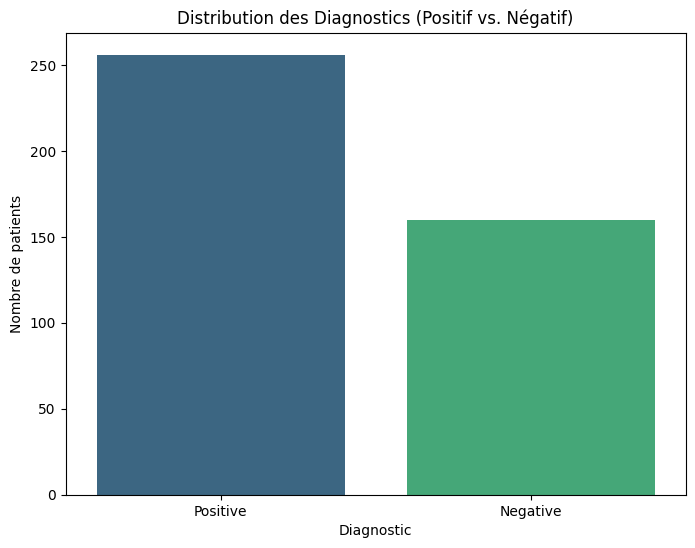

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution des Diagnostics (Positif vs. Négatif)')
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de patients')
plt.show()

"On observe un léger déséquilibre des classes, avec plus de cas positifs."

##### Distribution de l'âge en fonction du diagnostic

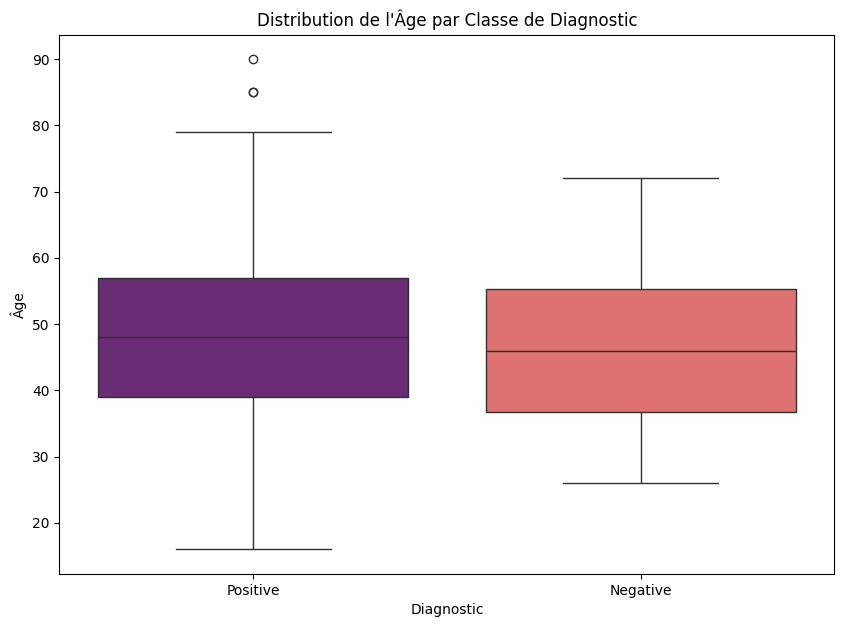

In [39]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='class', y='Age', data=df, palette='magma')
plt.title('Distribution de l\'Âge par Classe de Diagnostic')
plt.xlabel('Diagnostic')
plt.ylabel('Âge')
plt.show()

#### Analyse des variables catégorielles
#### On prend toutes les colonnes sauf 'Age' et 'class'

In [40]:
categorical_features = [col for col in df.columns if col not in ['Age', 'class']]

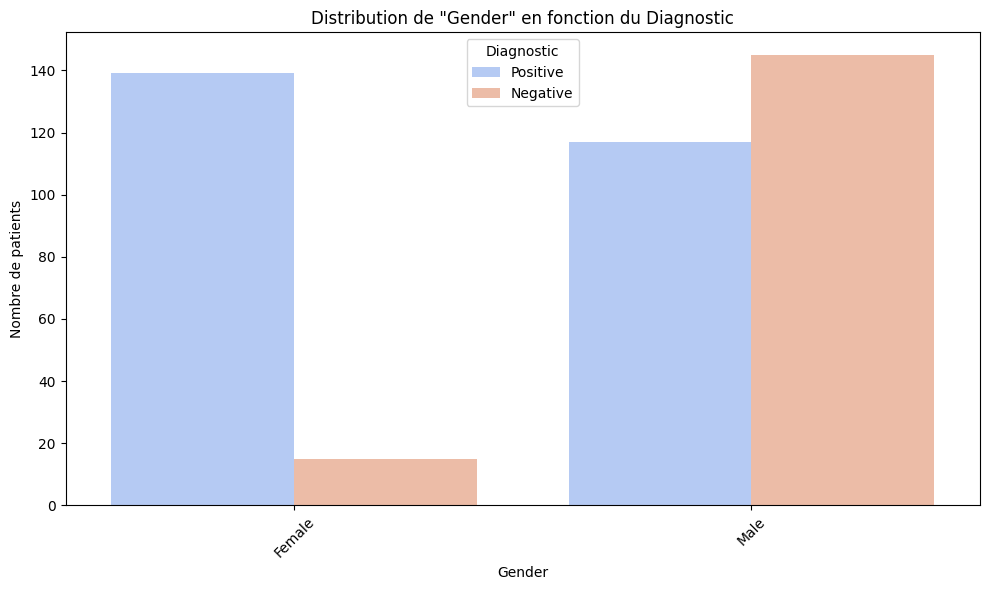

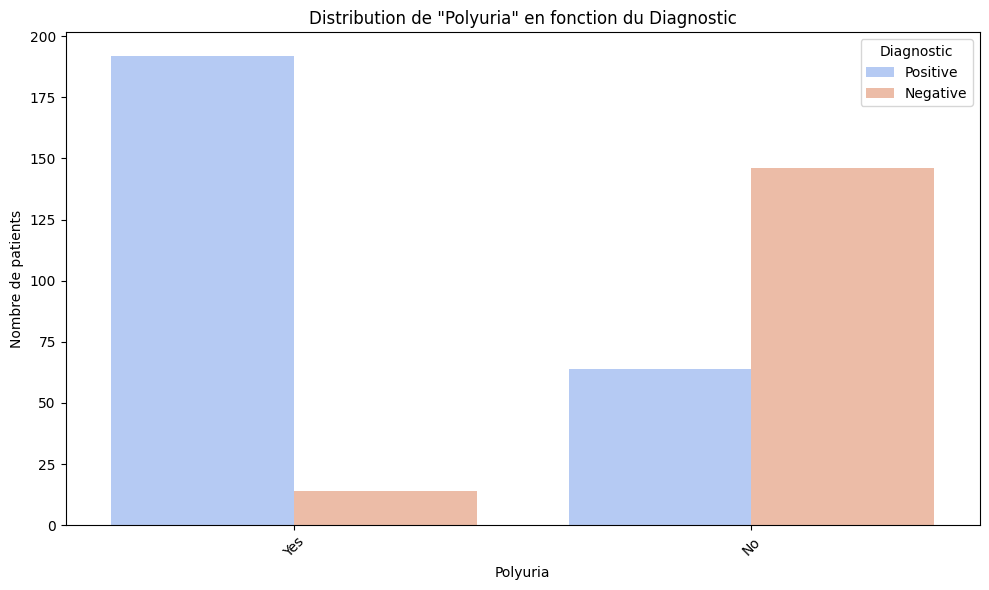

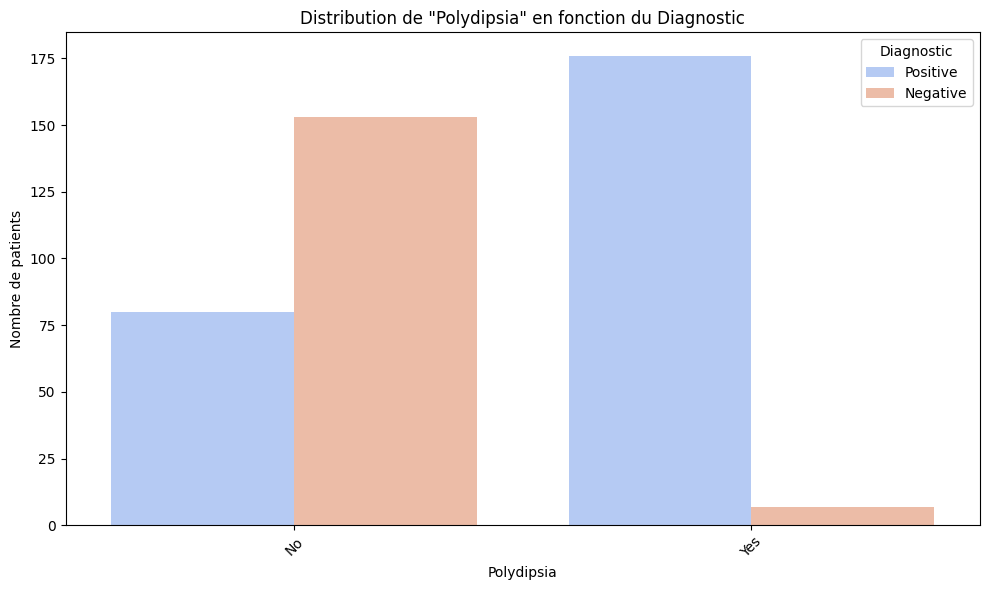

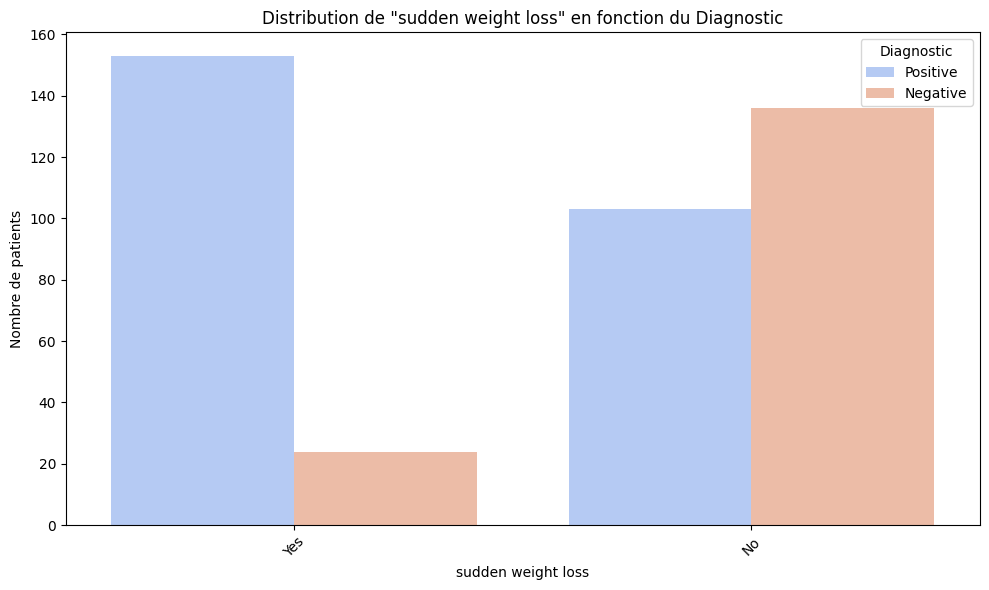

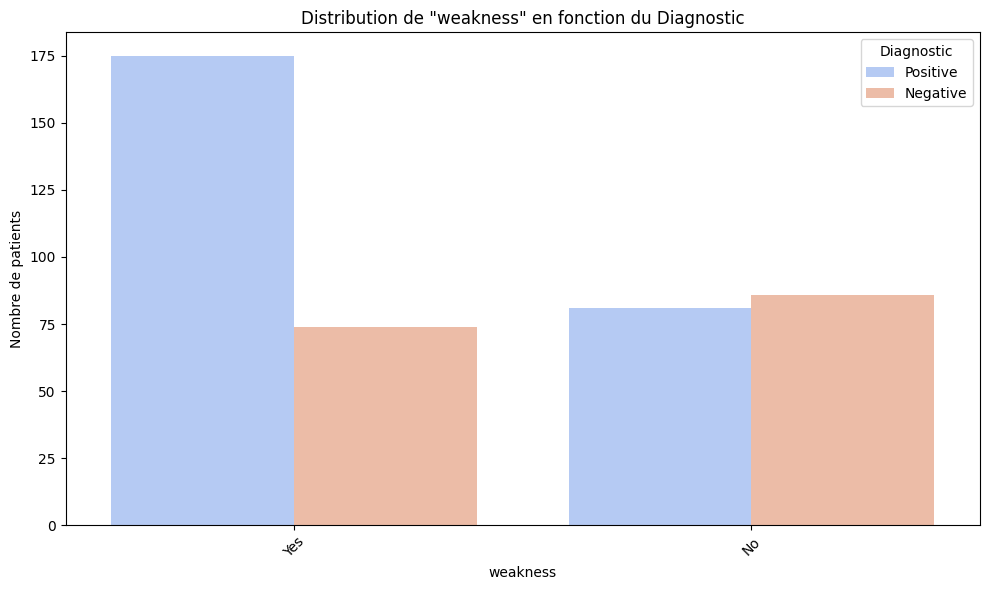

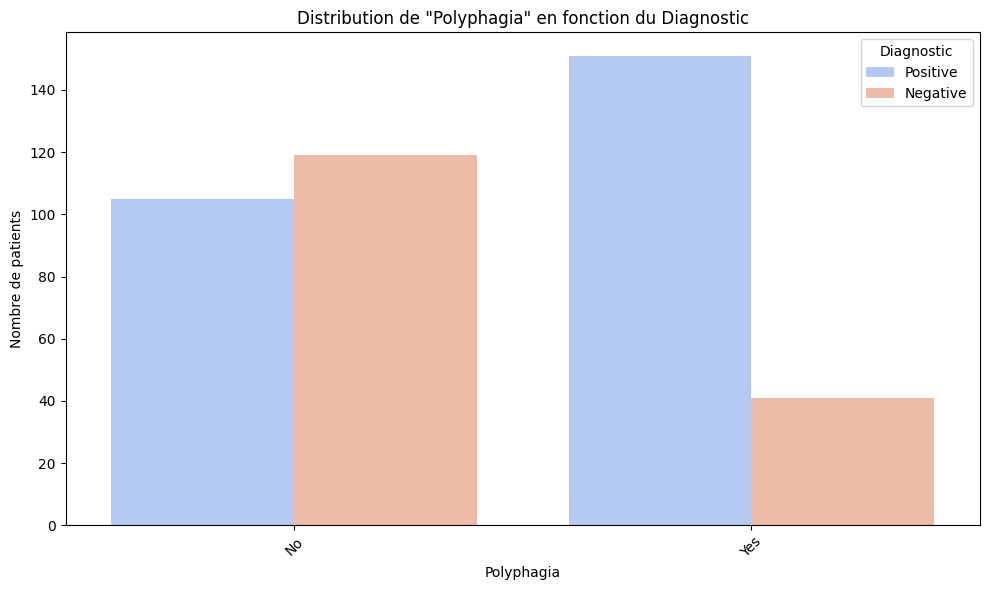

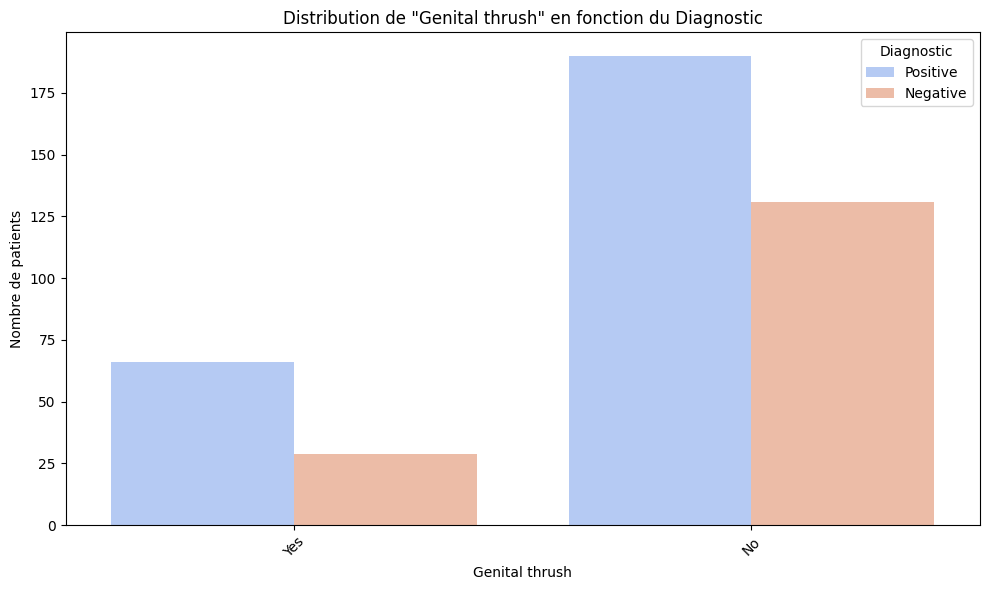

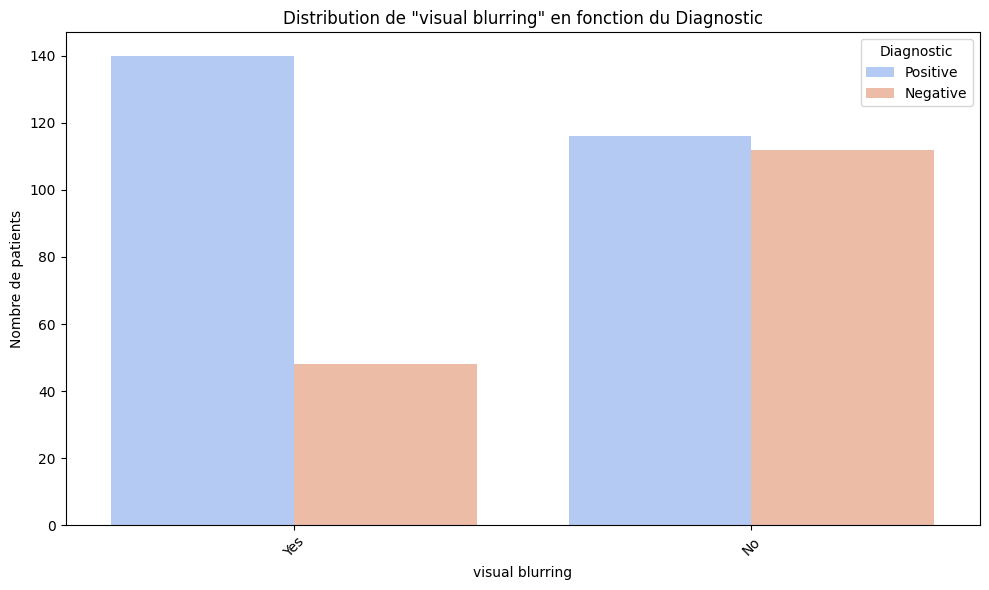

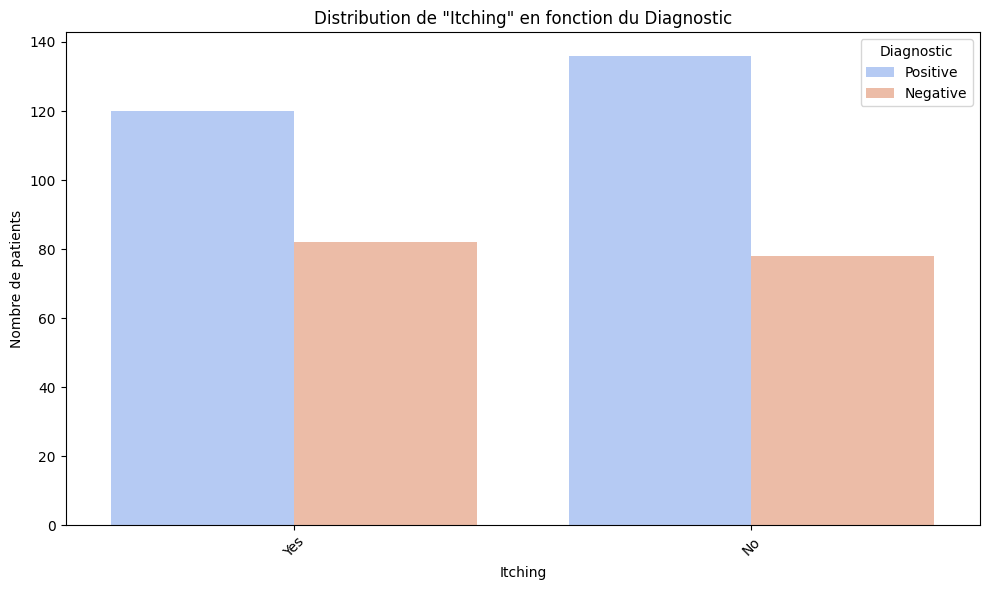

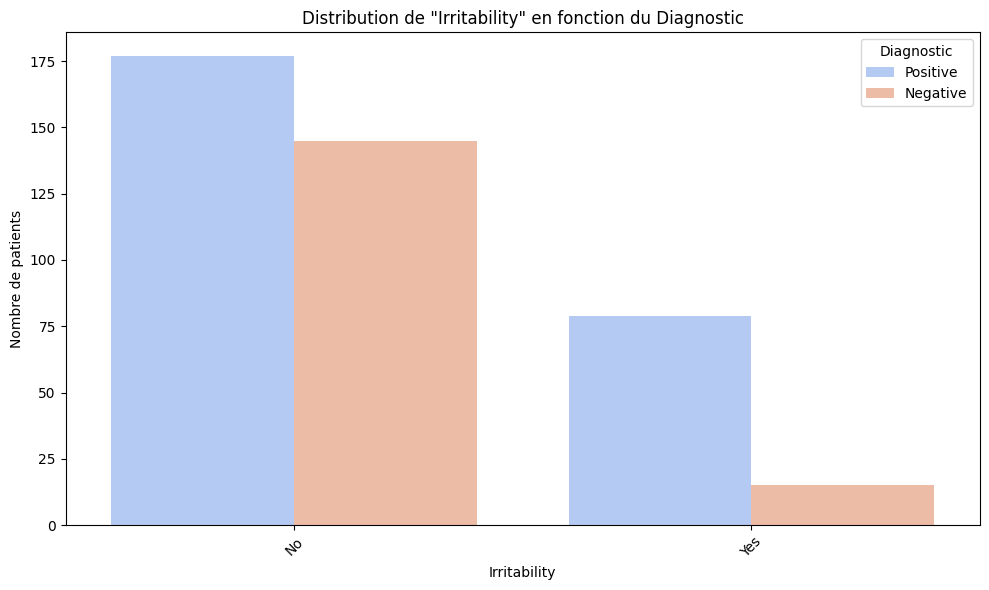

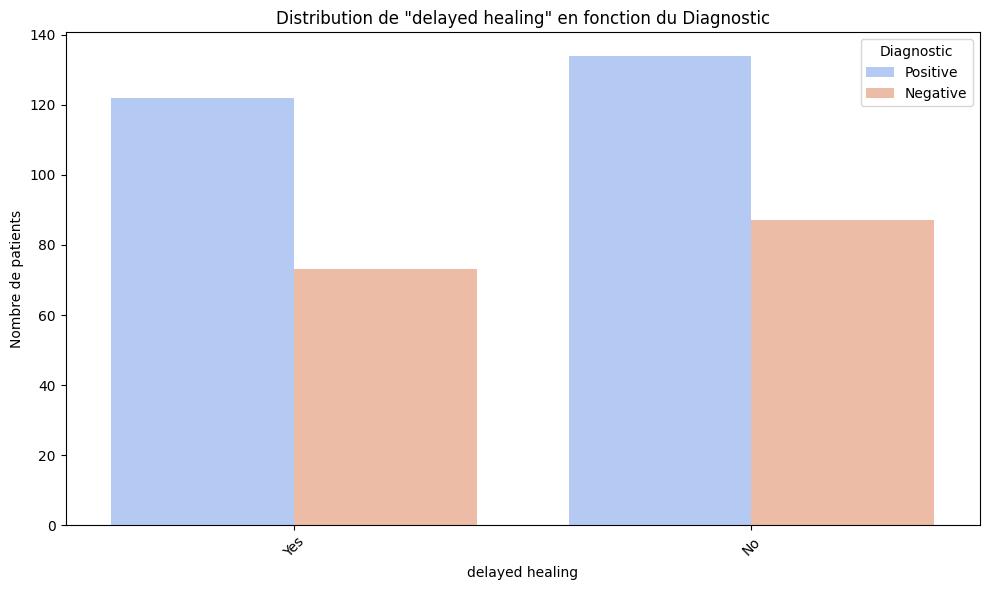

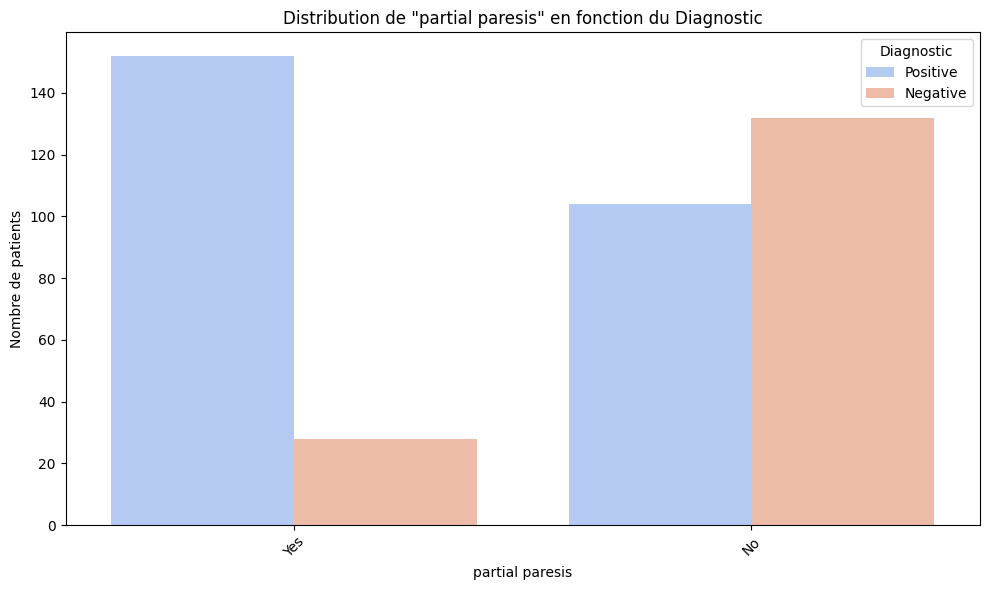

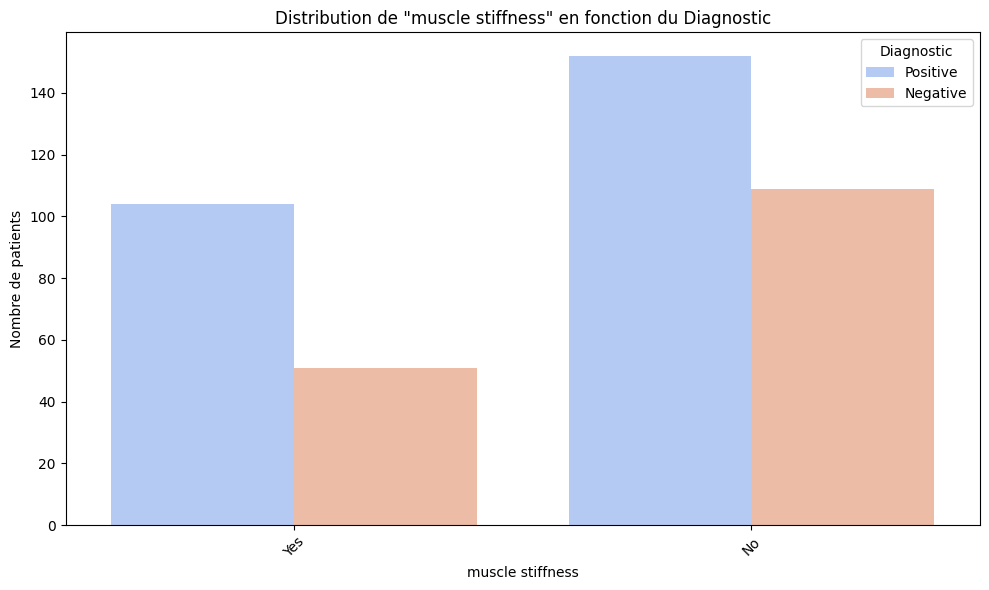

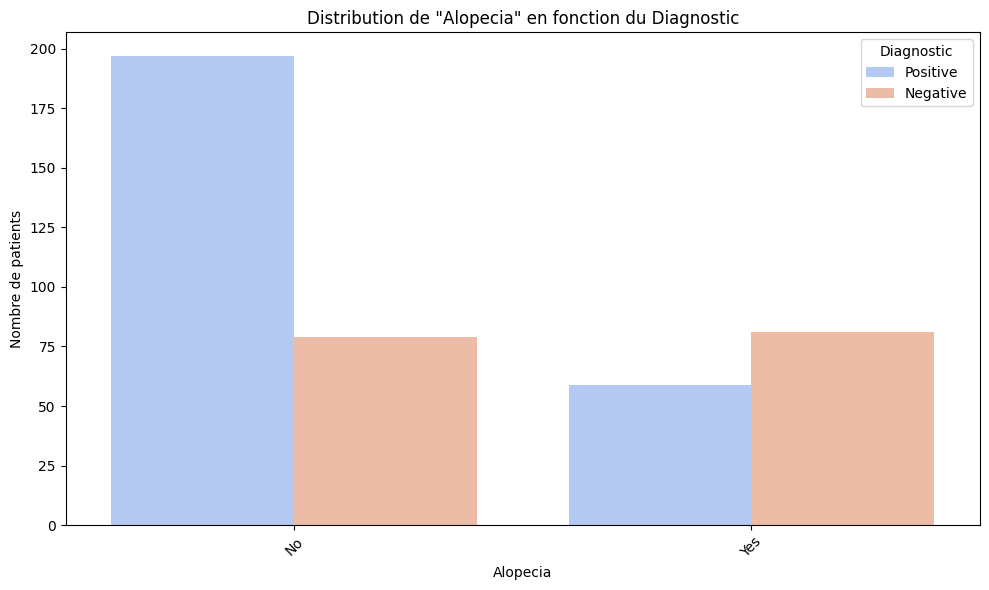

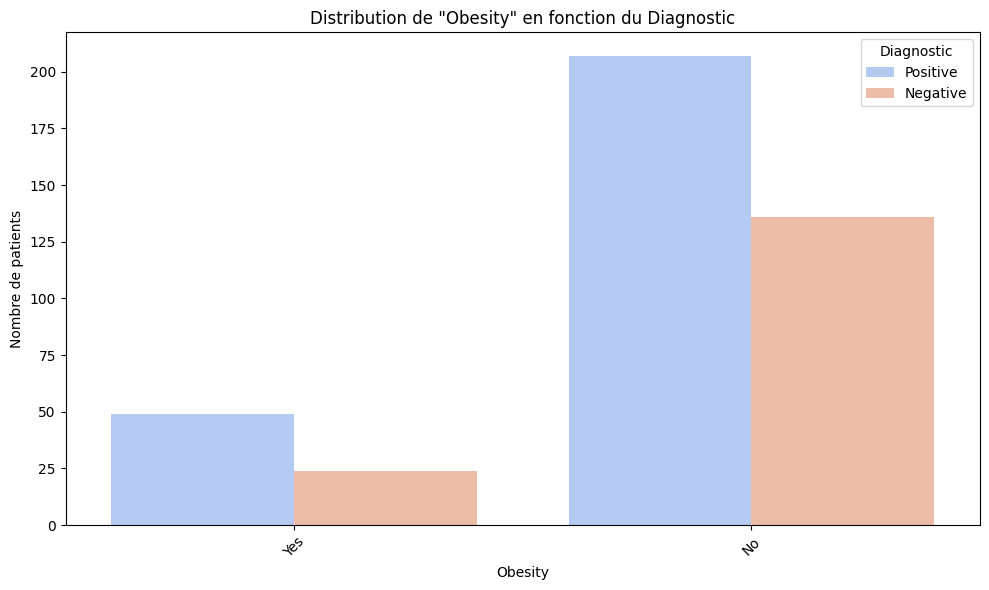

In [41]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='class', data=df, palette='coolwarm')
    plt.title(f'Distribution de "{feature}" en fonction du Diagnostic')
    plt.xlabel(feature)
    plt.ylabel('Nombre de patients')
    plt.xticks(rotation=45)
    plt.legend(title='Diagnostic')
    plt.tight_layout()
    plt.show()


"les symptômes **Polyuria** (uriner fréquemment) et **Polydipsia** (soif excessive) semblent être des indicateurs très forts d'un diagnostic positif."

## 7. Préparation des données pour la modélisation et le fichier clean"

In [42]:
print("\n--- Étape 4: Encodage des données pour la corrélation ---")
# Copier le dataframe pour ne pas modifier l'original nettoyé
df_encoded = df.copy()

# Utiliser LabelEncoder pour convertir toutes les colonnes de type 'object' en nombres
# Cela transforme les catégories (Oui/Non, Homme/Femme, etc.) en 0 et 1.
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        # Afficher le mapping pour comprendre l'encodage
        print(f"Mapping pour '{column}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nAperçu des données encodées numériquement :")
print(df_encoded.head())


--- Étape 4: Encodage des données pour la corrélation ---
Mapping pour 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping pour 'Polyuria': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Polydipsia': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'sudden weight loss': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'weakness': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Polyphagia': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Genital thrush': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'visual blurring': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Itching': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Irritability': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'delayed healing': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'partial paresis': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'muscle stiffness': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Alopecia': {'No': np.int64(

## 8. Matrice de corrélation


--- Création de la matrice de corrélation ---


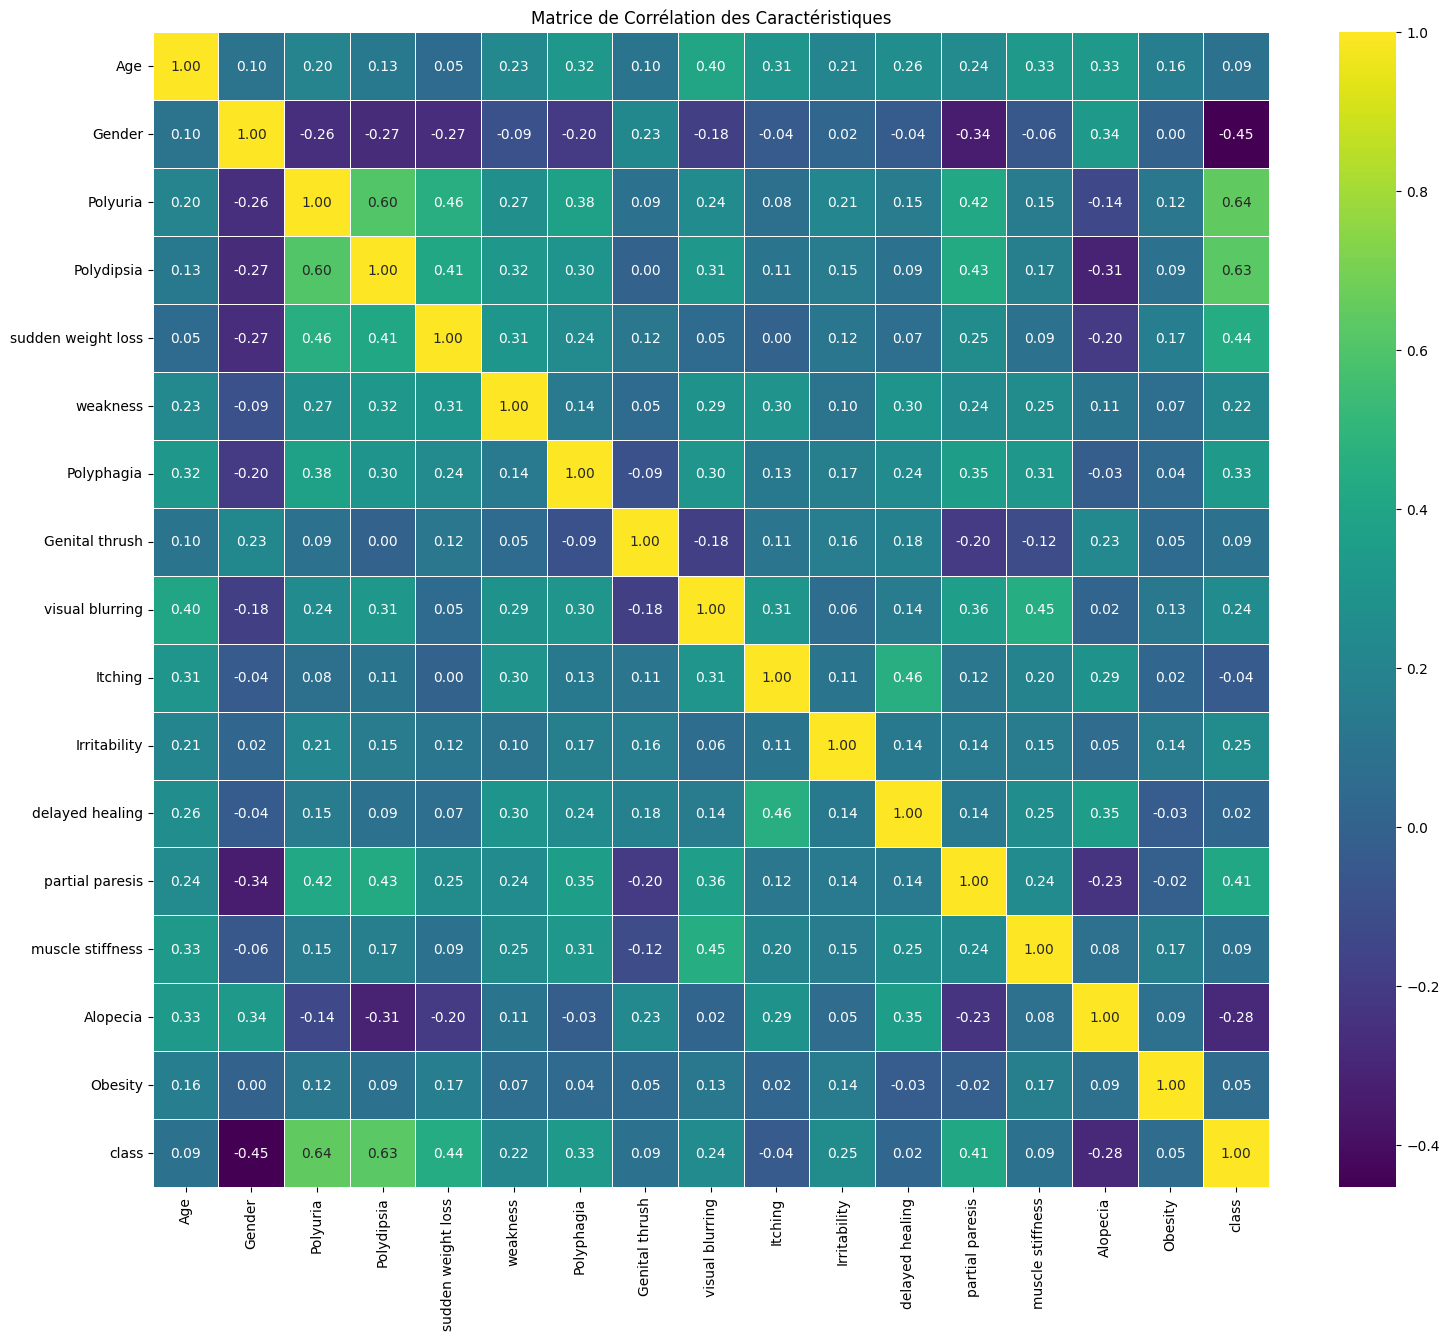

In [43]:
print("\n--- Création de la matrice de corrélation ---")
# Calculer la matrice de corrélation
corr_matrix = df_encoded.corr()

# Afficher la carte de chaleur (heatmap) pour visualiser les corrélations
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

## 9. Création du fichier 'diabetes_clean.csv

In [44]:
print("\n--- Création du fichier 'diabetes_clean.csv' ---")
output_filename = 'diabetes_clean.csv'

# Sauvegarder le DataFrame encodé dans un nouveau fichier CSV, sans l'index.
df_encoded.to_csv(output_filename, index=False)

print(f"Le fichier '{output_filename}' a été créé avec succès.")
print("\n--- FIN DU SCRIPT ---")


--- Création du fichier 'diabetes_clean.csv' ---
Le fichier 'diabetes_clean.csv' a été créé avec succès.

--- FIN DU SCRIPT ---
